In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import time
import pandas as pd

## Question(a) Sample and Subsample

In [2]:
### Inference grid defining {ui}i=1,Dx*Dy
Dx = 16
Dy = 16
N = Dx * Dy     # Total number of coordinates

 # Indexes for the inference grid
points = [(x, y) for y in np.arange(Dx) for x in np.arange(Dy)]            
# Coordinates for the inference grid   
coords = [(x, y) for y in np.linspace(0,1,Dy) for x in np.linspace(0,1,Dx)]

# Get x, y index lists
xi, yi = np.array([c[0] for c in points]), np.array([c[1] for c in points]) 
# Get x, y coordinate lists
x, y = np.array([c[0] for c in coords]), np.array([c[1] for c in coords])      


In [3]:
# subsample
subsample_factor = 4
idx = subsample(N, subsample_factor)  # sample 256/4=64 points from 256 points
M = len(idx)

print(len(idx))
idx

64


array([146, 194, 131,  61, 115,  40, 126,  13, 123,  11,  34, 156, 207,
       136, 152,  66, 128, 176, 228,  92,  32,  43,  97, 169, 172,  87,
       187, 178,  16,  68, 112,  56,   7, 214, 197, 143,  89, 161,  57,
       119,  93, 206,  76,  54,  91, 211,   3,  96, 106, 201,   8, 154,
        70, 238, 199, 216,  79,  22, 134,  26,  94, 110,  75, 125])

In [4]:
coords[:10]

[(0.0, 0.0),
 (0.06666666666666667, 0.0),
 (0.13333333333333333, 0.0),
 (0.2, 0.0),
 (0.26666666666666666, 0.0),
 (0.3333333333333333, 0.0),
 (0.4, 0.0),
 (0.4666666666666667, 0.0),
 (0.5333333333333333, 0.0),
 (0.6, 0.0)]

In [ ]:
# generate K
# symmetry matrix, similarity between points
l = 0.2
K = GaussianKernel(coords, l)  # calculate the kernel function based on coordinates
print(K.shape)

# sample from GP
z = np.random.randn(N, )  # 256 random numbers
Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))  # decomposed matrix of K
u = Kc @ z  # samples generated from Gaussian Process, function value. Latent varable.

print(len(u))

(256, 256)
256


In [6]:
# 16 * 16 = 256 numbers, 
K.shape

(256, 256)

In [7]:
### Observation model: v = G(u) + e,   e~N(0,I)
G = get_G(N, idx)  # 64 * 256
v = G @ u + np.random.randn(M)
v

array([-1.64638822,  0.73334963,  2.39046461,  0.81477918, -0.166286  ,
        1.5122435 ,  0.2892671 ,  2.91186406, -1.55417945,  2.43312056,
       -0.6782369 ,  0.79247175,  1.12637972,  1.31878816,  0.80363453,
        1.15184286, -1.33215123,  0.87734688,  1.23175957,  1.51739728,
       -0.03127113, -0.45825527, -0.54247388,  0.62150088,  0.5058081 ,
       -0.83121094,  0.13961722,  0.94681833,  0.41406923,  1.3717505 ,
       -1.37012189,  0.42581967, -0.311538  , -0.15029339,  0.8847127 ,
        0.94141435, -0.25142407,  0.1794431 ,  1.66869073, -1.15681714,
        1.50871435, -0.04861447,  0.11117177,  0.28456596,  0.16261481,
        2.27568636,  1.92959587, -2.19032414, -1.59327344,  0.25924382,
        3.01326894, -0.36396683, -0.7280622 , -0.77303321,  2.00833322,
       -1.94096946,  0.88633906, -1.8043014 ,  1.04262192,  1.91483925,
       -0.19454173,  3.4279492 , -0.91848239, -0.0435999 ])

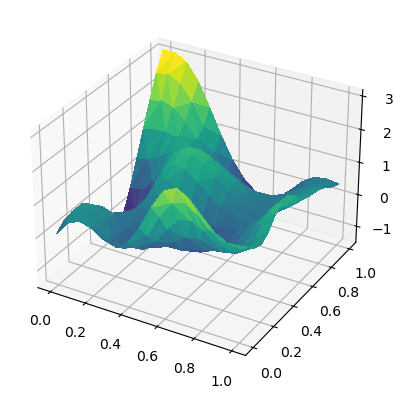

In [8]:
plot_3D(u, x, y)

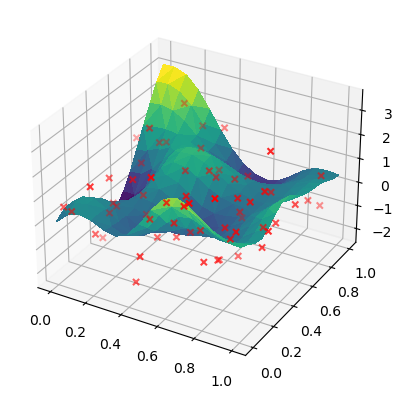

In [9]:
# l=0.2
plot_result(u, v, x, y, x[idx], y[idx])

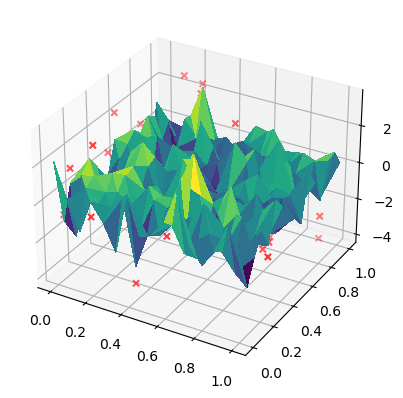

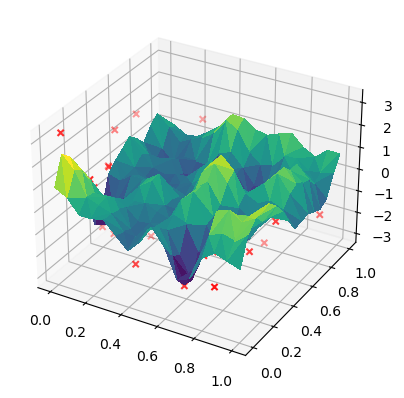

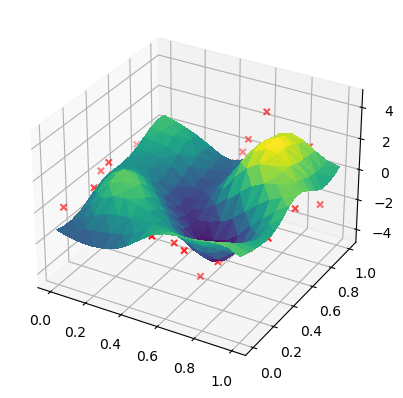

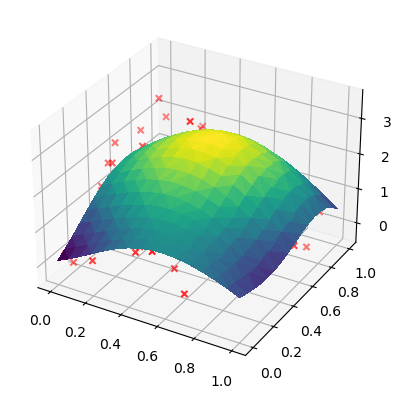

In [10]:
# l=0.01, 0.7, 1.5
ls = [0.01, 0.1, 0.2, 0.5]
for l in ls:
    # generate latent variable u which is under GP distribution
    K = GaussianKernel(coords, l)
    z = np.random.randn(N, )
    Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
    u = Kc @ z

    ### Observation model: v = G(u) + e, e~N(0,I)
    G = get_G(N, idx)
    v = G @ u + np.random.randn(M)

    plot_result(u, v, x, y, x[idx], y[idx]) 


## Question(b)

(1) Derive the formula from $p(u)$ and $p(v|u)$.   
$p(u) = N(0, K) \propto e^{-\frac{1}{2}u^T K^{-1}u}$  
  
$log(u) = -\frac{1}{2}u^T K^{-1} u + const$  

$v = Gu + \epsilon ～ N(Gu, I)$  
  
$p(v|u) = N(Gu, I) \propto e^{-\frac{1}{2}(v-Gu)^T(v-Gu)}$

(2) Complete the function in 'function.py'.  

see function.py for details.

(3) Generate and plot samples from $p(u|v)$ using GRW_MH and pCN.

In [11]:
def Data_generation(D, subsample_factor):
    Dx = D
    Dy = D
    N = Dx * Dy     # Total number of coordinates

    points = [(x, y) for y in np.arange(Dx) for x in np.arange(Dy)]                # Indexes for the inference grid. [0, D]
    coords = [(x, y) for y in np.linspace(0,1,Dy) for x in np.linspace(0,1,Dx)]    # Coordinates for the inference grid. [0, 1]

    xi, yi = np.array([c[0] for c in points]), np.array([c[1] for c in points])    # Get x, y index lists. [0, D]
    x, y = np.array([c[0] for c in coords]), np.array([c[1] for c in coords])      # Get x, y coordinate lists. [0, 1]

    ### Data grid defining {vi}i=1,N/subsample_factor - subsampled from inference grid
    subsample_factor = subsample_factor
    idx = subsample(N, subsample_factor)
    M = len(idx)                                                                   # Total number of data points

    ### Generate K, the covariance of the Gaussian process, and sample from N(0,K) using a stable Cholesky decomposition
    l = 0.2
    K = GaussianKernel(coords, l)
    z = np.random.randn(N, )
    Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
    u = Kc @ z

    ### Observation model: v = G(u) + e,   e~N(0,I)
    G = get_G(N, idx)
    v = G @ u + np.random.randn(M)

    return xi, yi, x, y, K, u, idx, N, M, G, v


#### (i) Use GRW_MH to generate $u$ ~ $f(u|v)$.  
(v is fixed, u0 is newly generated.)  
generate data from f(u|v), posterior.

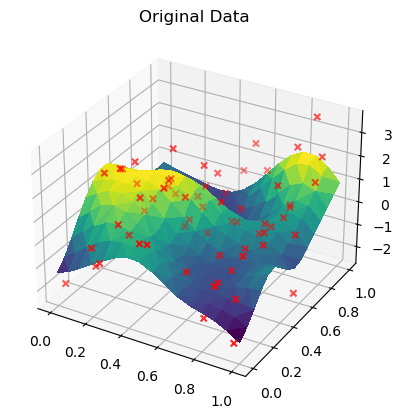

In [12]:
# Initialize the data
xi, yi, x, y, K, u, idx, N, M, G, v = Data_generation(D=16,subsample_factor=4)

# Original Data
plot_result(title = "Original Data", u = u, data = v, x = x, y = y, x_d = x[idx], y_d = y[idx])

In [13]:
# generate u_0
z = np.random.randn(N)
Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
u0 = Kc @ z

start_time = time.time()
# posterior of u, that is p(u|v)
X_grw, acceptance_rate_grw = grw(log_target=log_continuous_target, 
                                 u0 = u0, data = v, 
                                 K = K, G = G,
                                 n_iters = 10000, beta = 0.2
                                 )
end_time = time.time()
runtime_grw = end_time - start_time

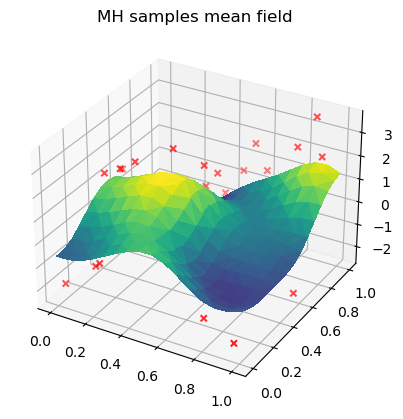

In [14]:
plot_result(title = "MH samples mean field", u = np.mean(X_grw, axis = 0), data = v, x = x, y = y, x_d = x[idx], y_d = y[idx])

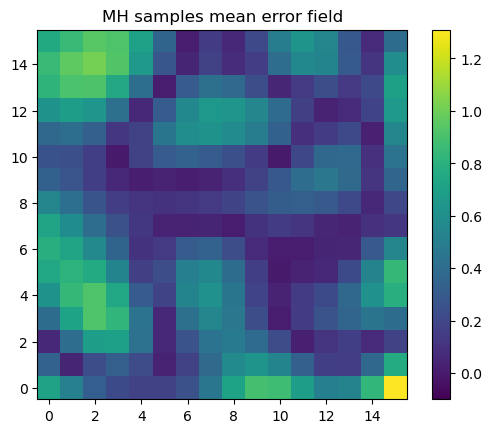

In [15]:
grw_abs_error = abs(u - np.mean(X_grw, axis = 0))
plot_2D(grw_abs_error, xi, yi, title='MH samples mean error field')

#### (ii) Using pCN to generate from p(u|v)
Equals to generate from likelihood p(v|u).

In [16]:
# generate u_0
z = np.random.randn(N)
Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
u0 = Kc @ z

start_time = time.time()
# posterior of u, that is p(u|v)
X_pcn, acceptance_rate_pcn = pcn(log_likelihood=log_continuous_likelihood, 
                                 u0 = u0, y = v, 
                                 K = K, G = G,
                                 n_iters = 10000, beta = 0.2)
end_time = time.time()
runtime_pcn = end_time - start_time

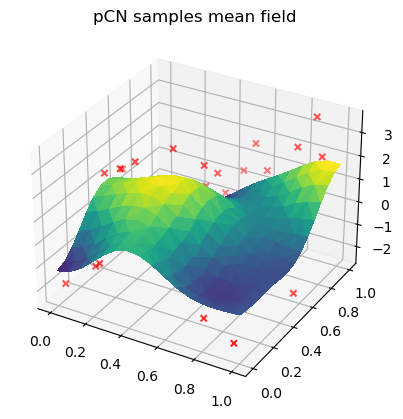

In [17]:
plot_result(title = "pCN samples mean field", u = np.mean(X_pcn, axis = 0), data = v, x = x, y = y, x_d = x[idx], y_d = y[idx])

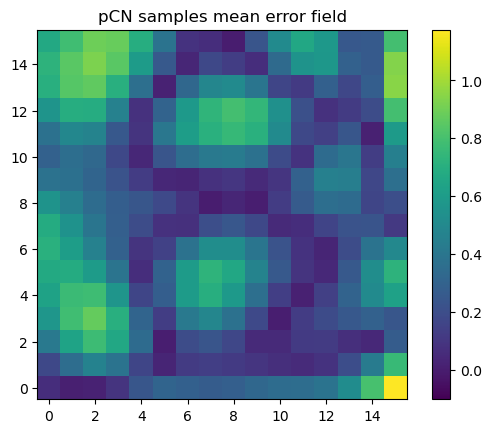

In [18]:
pcn_abs_error = abs(u - np.mean(X_pcn, axis = 0))
plot_2D(pcn_abs_error, xi, yi, title='pCN samples mean error field')

Comparing both algorithms:  
Run for 10000 times, calculate the average:  
(i) Acceptance rate.  
(ii) Run time.  
(iii) Average error.

In [19]:
print('Acceptance Rate:',acceptance_rate_grw, acceptance_rate_pcn)
print('Runtime:',runtime_grw, runtime_pcn)
print('Estimate error:',grw_abs_error.mean(),pcn_abs_error.mean())

Acceptance Rate: 0.0755 0.4352
Runtime: 73.5642957687378 1.2104859352111816
Estimate error: 0.3591882234260963 0.35690089773135425


(4) Comment on the GRW-MH and pCN acceptance rate for low and high dimentional latent variable spaces.

Vary $\beta$ between 0 and 1. Comment on the effect on acceptance rate. What about small $\beta$.

Using MH:

In [20]:
# param choices
Ds = [4, 16]
betas = [0, 0.2, 0.4, 0.6, 0.8, 1]
results = []

# initialize the data
for D_exp in Ds:
    for beta_exp in betas:
        # generate data
        xi, yi, x, y, K, u, idx, N, M, G, v = Data_generation(D_exp,subsample_factor=4)

        # experiment
        z = np.random.randn(N)
        Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
        u0 = Kc @ z

        # posterior of u, that is p(u|v)
        X_grw, acceptance_rate_grw = grw(log_target=log_continuous_target, 
                                        u0 = u0, data = v, 
                                        K = K, G = G,
                                        n_iters = 10000, beta = beta_exp
                                        )
        
        grw_abs_error = abs(u - np.mean(X_grw, axis = 0))
        meanerror = np.mean(grw_abs_error)

        results.append({
            "D": D_exp,
            "beta" : beta_exp,
            "acceptance_rate": acceptance_rate_grw,
            "meanerror": meanerror
            
        })

df = pd.DataFrame(results)
print(df)
df.to_csv("GRW_experiment_results.csv", index=False)


     D  beta  acceptance_rate  meanerror
0    4   0.0           1.0000   1.051970
1    4   0.2           0.6619   0.470322
2    4   0.4           0.3905   0.638392
3    4   0.6           0.2092   0.723032
4    4   0.8           0.0970   0.804441
5    4   1.0           0.0374   0.890125
6   16   0.0           1.0000   1.171369
7   16   0.2           0.0842   0.508750
8   16   0.4           0.0030   0.507095
9   16   0.6           0.0000   0.973390
10  16   0.8           0.0001   1.125364
11  16   1.0           0.0000   1.335307


Use pCN.

In [21]:
results = []
# initialize the data
for D_exp in Ds:
    for beta_exp in betas:
        # generate data
        xi, yi, x, y, K, u, idx, N, M, G, v = Data_generation(D_exp,subsample_factor=4)

        # generate u_0
        z = np.random.randn(N)
        Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
        u0 = Kc @ z

        # posterior of u, that is p(u|v)
        X_pcn, acceptance_rate_pcn = pcn(log_likelihood=log_continuous_likelihood, 
                                        u0 = u0, y = v, 
                                        K = K, G = G,
                                        n_iters = 10000, beta = beta_exp)
        
        pcn_abs_error = abs(u - np.mean(X_pcn, axis = 0))
        meanerror = np.mean(pcn_abs_error)

        results.append({
            "D": D_exp,
            "beta" : beta_exp,
            "acceptance_rate": acceptance_rate_pcn,
            "meanerror": meanerror
        })

df = pd.DataFrame(results)
print(df)
df.to_csv("pCN_experiment_results.csv", index=False)

     D  beta  acceptance_rate  meanerror
0    4   0.0           1.0000   1.167624
1    4   0.2           0.8183   0.887483
2    4   0.4           0.7037   0.435359
3    4   0.6           0.4406   0.709756
4    4   0.8           0.3067   0.875953
5    4   1.0           0.0252   0.610741
6   16   0.0           1.0000   1.005472
7   16   0.2           0.4468   0.396297
8   16   0.4           0.1556   0.567998
9   16   0.6           0.0212   0.395679
10  16   0.8           0.0090   0.437364
11  16   1.0           0.0006   0.574154


(5) Extension: Increase D. Compare pCN to GRW.

In [22]:
# GRW
Ds = [4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
results = []

# initialize the data
for D_exp in Ds:
    # generate data
    xi, yi, x, y, K, u, idx, N, M, G, v = Data_generation(D_exp,subsample_factor=4)

    # experiment
    z = np.random.randn(N)
    Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
    u0 = Kc @ z

    # posterior of u, that is p(u|v)
    X_grw, acceptance_rate_grw = grw(log_target=log_continuous_target, 
                                    u0 = u0, data = v, 
                                    K = K, G = G,
                                    n_iters = 100, beta = 0.2
                                    )
    
    grw_abs_error = abs(u - np.mean(X_grw, axis = 0))
    meanerror = np.mean(grw_abs_error)

    results.append(acceptance_rate_grw)

print(results)


[0.71, 0.55, 0.4, 0.25, 0.38, 0.19, 0.13, 0.19, 0.09, 0.11, 0.14, 0.16, 0.11, 0.04, 0.06]


In [23]:
results = []
# initialize the data
for D_exp in Ds:
    # generate data
    xi, yi, x, y, K, u, idx, N, M, G, v = Data_generation(D_exp,subsample_factor=4)

    # generate u_0
    z = np.random.randn(N)
    Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
    u0 = Kc @ z

    # posterior of u, that is p(u|v)
    X_pcn, acceptance_rate_pcn = pcn(log_likelihood=log_continuous_likelihood, 
                                    u0 = u0, y = v, 
                                    K = K, G = G,
                                    n_iters = 100, beta = 0.2)
    
    pcn_abs_error = abs(u - np.mean(X_pcn, axis = 0))
    meanerror = np.mean(pcn_abs_error)

    results.append(acceptance_rate_pcn)

print(results)

[0.83, 0.75, 0.74, 0.58, 0.62, 0.47, 0.51, 0.41, 0.46, 0.49, 0.43, 0.49, 0.37, 0.4, 0.35]


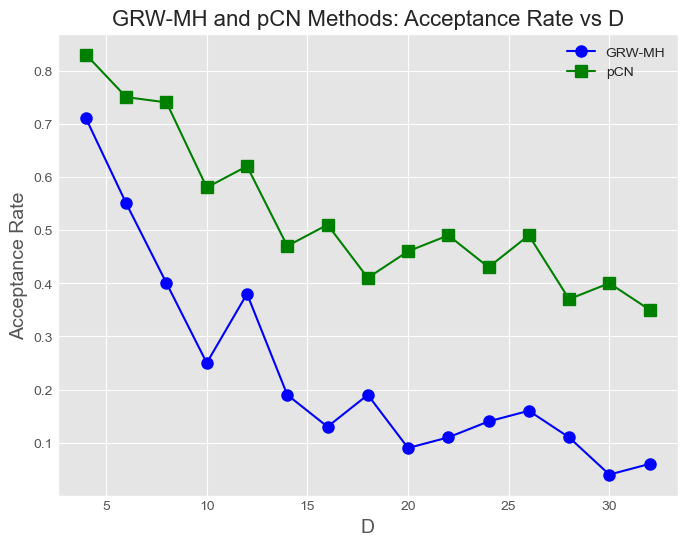

In [129]:
# Data
Ds = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
results = [0.71, 0.55, 0.4, 0.25, 0.38, 0.19, 0.13, 0.19, 0.09, 0.11, 0.14, 0.16, 0.11, 0.04, 0.06]
result2 = [0.83, 0.75, 0.74, 0.58, 0.62, 0.47, 0.51, 0.41, 0.46, 0.49, 0.43, 0.49, 0.37, 0.4, 0.35]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot GRW-MH method (results)
plt.plot(Ds, results, marker='o', color='b', linestyle='-', markersize=8, label='GRW-MH')

# Plot pCN method (result2)
plt.plot(Ds, result2, marker='s', color='g', linestyle='-', markersize=8, label='pCN')

# Add labels and title
plt.xlabel('D', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.title('GRW-MH and pCN Methods: Acceptance Rate vs D', fontsize=16)

# Display the legend
plt.legend()

# Display the grid
plt.grid(True)

# Show the plot
plt.show()


## Question (c)


(i) Derive the full log-likelihood.  
$p(\textbf{t}|\textbf{u}) =  \prod_{i=1}^{N} p(t_i|\textbf{u})$  
$log[p(\textbf{u}|\textbf{t})] = \sum_{i=1}^N log[p(t_i=1|\textbf{u})^{t_i} p(t_i=0|\textbf{u})^{1-t_i}]$
$= \sum_{i=1}^N t_i log[\phi(u_i)]+(1-t_j)log[1-\phi(u_j)]$  

and completed $log\_probit\_likelihood$ to return $p(\textbf{t}|\textbf{u})$.

In [17]:
from functions import *


(ii) Generate samples using pCN from $p(\textbf{u}|\textbf{t})$

In [86]:
# set params
D = 16
xi, yi, x, y, K, u, idx, N, M, G, v = Data_generation(D,subsample_factor=4)

t = probit(v)

# generate u_0
z = np.random.randn(N)
Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
u0 = Kc @ z

# generate sample from p(t|u) using pCN (from p(t|u))
X_pcn, acceptance_rate_pcn = pcn(log_likelihood=log_probit_likelihood, 
                                    u0 = u0, y = t, 
                                    K = K, G = G,
                                    n_iters = 10000, beta = 0.2)


(iii) Predict $\textbf{t}_{ture} = probit(\textbf{u})$  
$p(t_i^*=1|\textbf{t}) = \frac{1}{M}\sum_{j=1}^{M} p(t_i^*=1|\textbf{u}^{(j)})=\frac{1}{M}\sum_{j=1}^M \phi(u_i^{(j)})$  
Completed $predict\_t(u)$.

In [87]:
# make predictions
X_pcn = np.array(X_pcn)
preds = predict_t(X_pcn)

Visualisation.

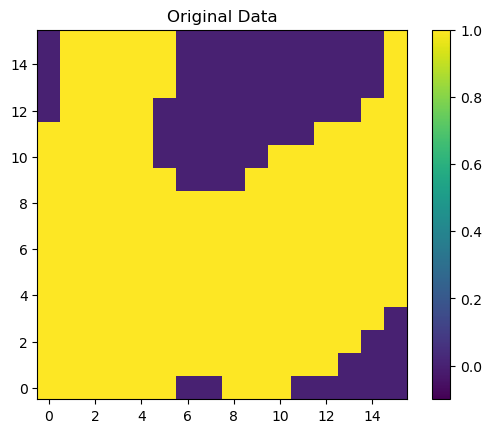

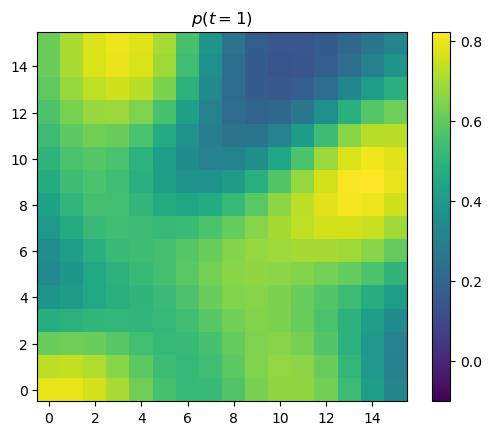

In [88]:
# True data
# Plot true class assignments, original data
plot_2D(probit(u), xi, yi, title='Original Data')

# # sampled and probit data
# plot_2D(t, xi[idx], yi[idx], title='Probit Data')

# Predicted data
plot_2D(preds, xi, yi, title = '$p(t=1)$')


# # predicted result
# plot_2D(preds > 0.365, xi, yi, title = '$p(t=1) > 0.5$')

plt.show()

## Question(d)

(i) Make hard assignments by 0.5.

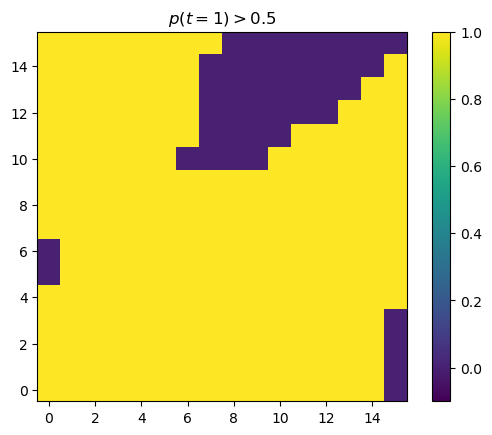

In [89]:
plot_2D(preds > 0.365, xi, yi, title = '$p(t=1) > 0.5$')

(ii) Mean prediction error.

In [117]:
# params
n = 1000
beta = 0.2

ls = np.logspace(-2, 1, 100)
ls = np.append(ls, 0.3)
ls.sort()

coords = [(x, y) for y in np.linspace(0,1,D) for x in np.linspace(0,1,D)]
Ks = [GaussianKernel(coords, l) for l in ls]

mean_pred_errors = np.zeros(101)
true_class = probit(u)
t = probit(v)

for i in range(len(ls)):
    # generate u_0
    z = np.random.randn(N)
    Kc = np.linalg.cholesky(Ks[i] + 1e-6 * np.eye(D*D))
    u0 = Kc @ z

    pcn_samples, acceptance_rate_pcn = pcn(log_likelihood=log_probit_likelihood, 
                                    u0 = u0, y = t, 
                                    K = Ks[i], G = G,
                                    n_iters = n, beta = beta)
    predictions = predict_t(np.array(pcn_samples))
    
    hard_class = 1 * (predictions >= 0.5)
    abs_error = np.abs(hard_class - true_class)

    mean_pred_errors[i] = np.mean(abs_error)


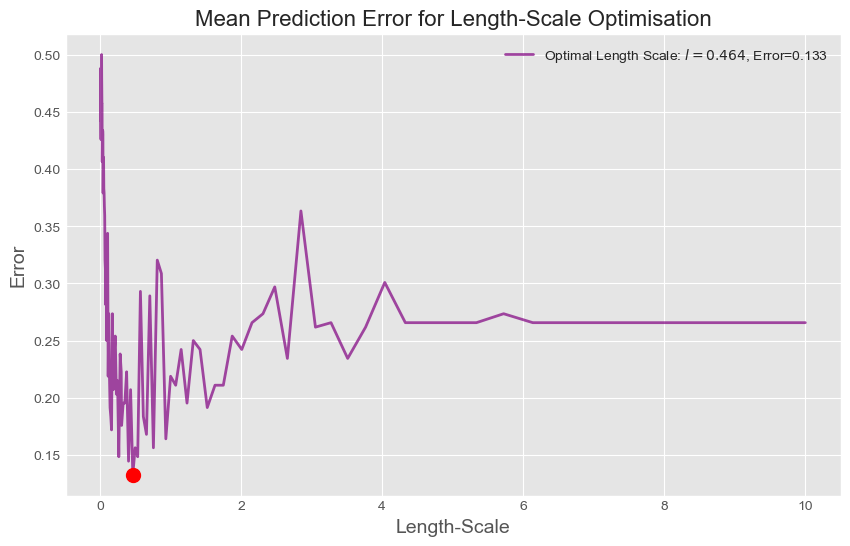

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Change style
# plt.style.use('ggplot')  # Use ggplot style, which has a light background and visible grid lines

# Assume ls and mean_pred_errors are already defined
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size

# Find the index of the minimum error
id = np.argmin(mean_pred_errors)

# Set axis labels and title
ax.set_xlabel("Length-Scale", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.set_title("Mean Prediction Error for Length-Scale Optimisation", fontsize=16)

# Plot the entire variation curve
ax.plot(ls, mean_pred_errors, color='purple', linewidth=2, alpha=0.7, label="Mean Prediction Error")

# Mark the optimal Length-Scale point with red dot
ax.plot(ls[id], mean_pred_errors[id], 'ro', markersize=10)

# Display the legend with the minimum value in the label
ax.legend([f"Optimal Length Scale: $l={round(ls[id], 3)}$, Error={round(mean_pred_errors[id], 3)}"])

# Show the plot
plt.show()

Find and plot minimum value.

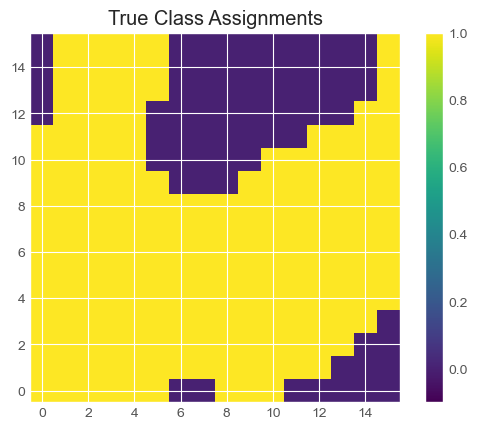

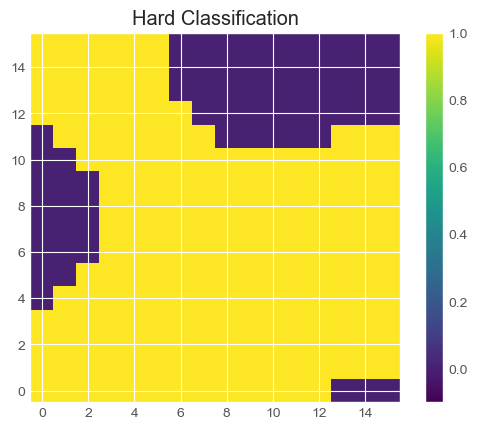

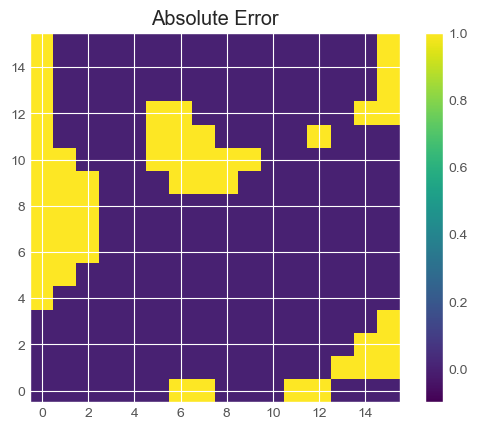

In [127]:
l = ls[id]
K = GaussianKernel(coords, l)

z = np.random.randn(N)
Kc = np.linalg.cholesky(K + 1e-6 * np.eye(D*D))
u0 = Kc @ z

pcn_samples, acceptance_rate_pcn = pcn(log_likelihood=log_probit_likelihood, 
                                u0 = u0, y = t, 
                                K = K, G = G,
                                n_iters = n, beta = beta)
predictions = predict_t(np.array(pcn_samples))

hard_class = 1 * (predictions >= 0.5)
abs_error = np.abs(hard_class - true_class)

exp_mean_pred_errors = np.mean(abs_error)

plot_2D(true_class, xi, yi, title='True Class Assignments')
plot_2D(hard_class, xi, yi, title='Hard Classification')
# plot_2D(t, xi[idx], yi[idx], title='Subsampled Assignments')
plot_2D(abs_error, xi, yi, title='Absolute Error')